# Explatory Data Analysis
Forex XAUUSD Trend Prediction Using Machine Learning Python

In [53]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import scipy.stats as stats

In [34]:
# Load the Dataset
df = pd.read_csv('/Users/arietrisn/Documents/Career/Data Analyst:Science/Bootcamp/Forex Trend Analysis Project/clean_xauusd.csv')
df.head()

,date,price,open,high,low,change
0,2024-12-31,2623.81,2606.13,2627.85,2602.50,0.0071
1,2024-12-30,2605.39,2620.30,2628.61,2595.90,-0.0056
2,2024-12-27,2620.00,2634.59,2638.74,2611.30,-0.0055
3,2024-12-26,2634.43,2619.79,2639.40,2614.13,0.0081
4,2024-12-24,2613.20,2613.07,2621.83,2609.92,0.0001


In [35]:
df = df.set_index('date')
df = df.sort_index()
df.head()

,price,open,high,low,change
date,,,,,
2014-01-01,1205.90,1210.41,1210.61,1199.40,0.0003
2014-01-02,1224.89,1204.88,1231.04,1203.72,0.0157
2014-01-03,1236.55,1224.94,1240.38,1222.14,0.0095
2014-01-06,1238.05,1236.93,1248.76,1233.10,0.0012
2014-01-07,1232.10,1238.17,1245.86,1225.20,-0.0048


In [56]:
df.describe()

,price,open,high,low,change
count,2863.000000,2863.000000,2863.000000,2863.000000,2863.00000
mean,1572.529920,1572.269923,1582.874209,1562.123968,0.00031
std,386.727695,386.459405,389.788008,383.387017,0.00872
min,1051.740000,1051.720000,1061.410000,1046.250000,-0.05730
25%,1255.315000,1255.445000,1261.700000,1248.000000,-0.00440
50%,1409.500000,1406.410000,1419.720000,1400.250000,0.00030
75%,1847.585000,1848.040000,1862.365000,1833.860000,0.00500
max,2786.190000,2787.750000,2790.410000,2770.650000,0.04800


In [36]:
# Candlestick
fig = go.Figure(data = [go.Candlestick(x = df.index, open = df['open'],
                                       high = df['high'],
                                       low = df['low'],
                                       close = df['price'])])

fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

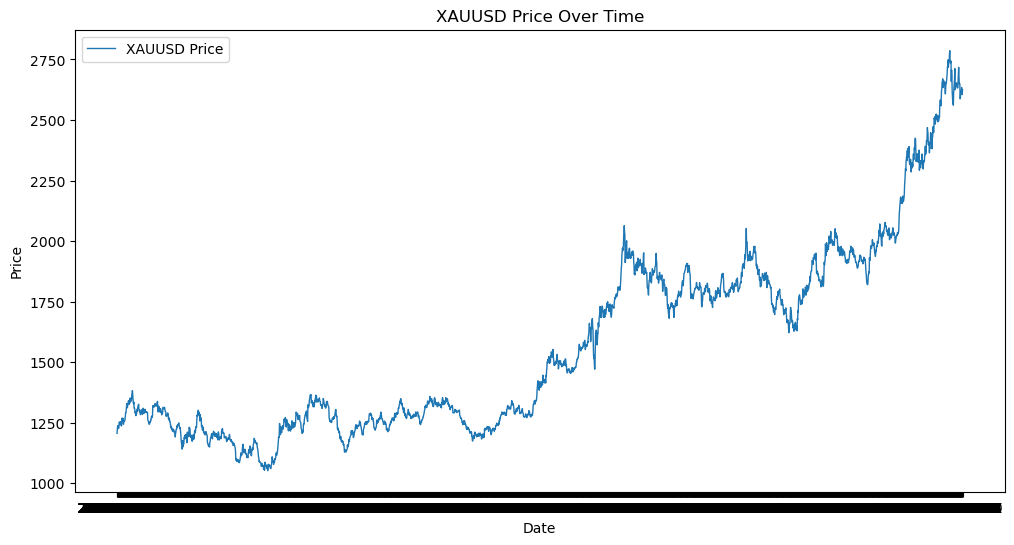

In [37]:
# XAUUSD Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['price'], label = 'XAUUSD Price', linewidth = 1)
plt.title('XAUUSD Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [15]:
# Creating Moving Average Value

ma50 = df.price.rolling(50).mean()
ma20 = df.price.rolling(20).mean()
ma15 = df.price.rolling(15).mean()

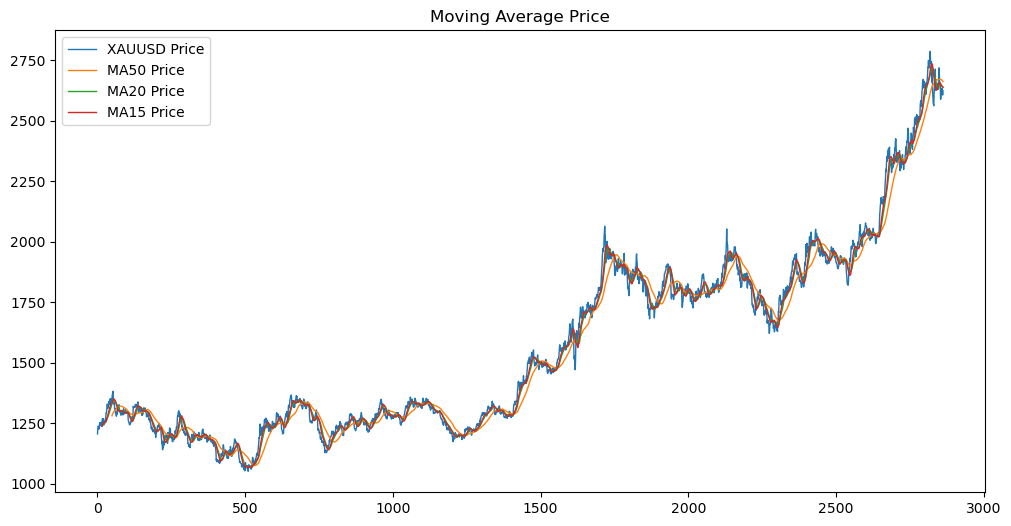

In [16]:
# Price and Moving Average Comparison

plt.figure(figsize=(12,6))
plt.plot(df.price, label = 'XAUUSD Price', linewidth = 1)
plt.plot(ma50, label = 'MA50 Price', linewidth = 1)
plt.plot(ma20, label = 'MA20 Price', linewidth = 1)
plt.plot(ma15, label = 'MA15 Price', linewidth = 1)
plt.title('Moving Average Price')
plt.legend()
plt.show()

In [38]:
ema = df.price.ewm(com=12).mean()

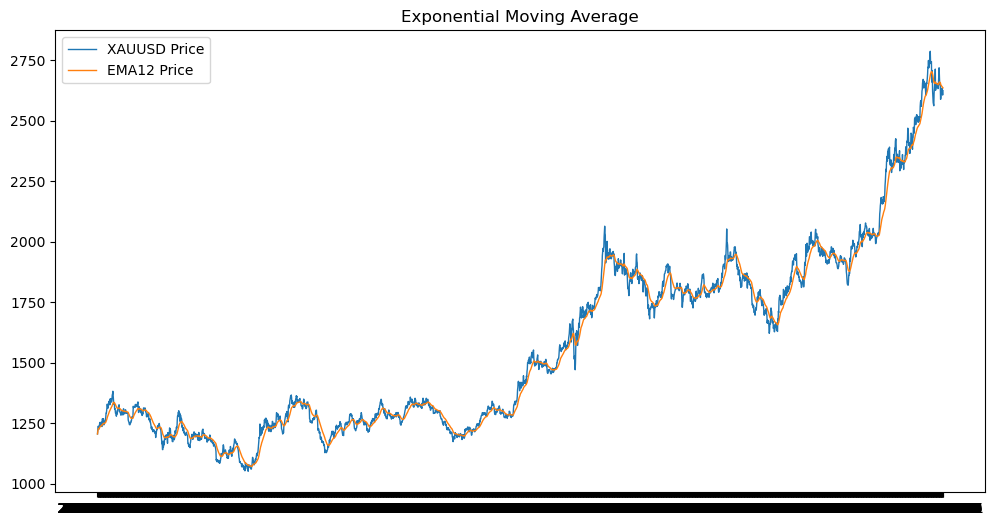

In [39]:
# Exponential Moving Average and Price Comparison

plt.figure(figsize=(12,6))
plt.plot(df.price, label = 'XAUUSD Price', linewidth = 1)
plt.plot(ema, label = 'EMA12 Price', linewidth = 1)
plt.title('Exponential Moving Average')
plt.legend()
plt.show()

In [40]:
# Relative Strength Index
import ta

rsi = ta.momentum.RSIIndicator(close=df['price'], window=14).rsi()

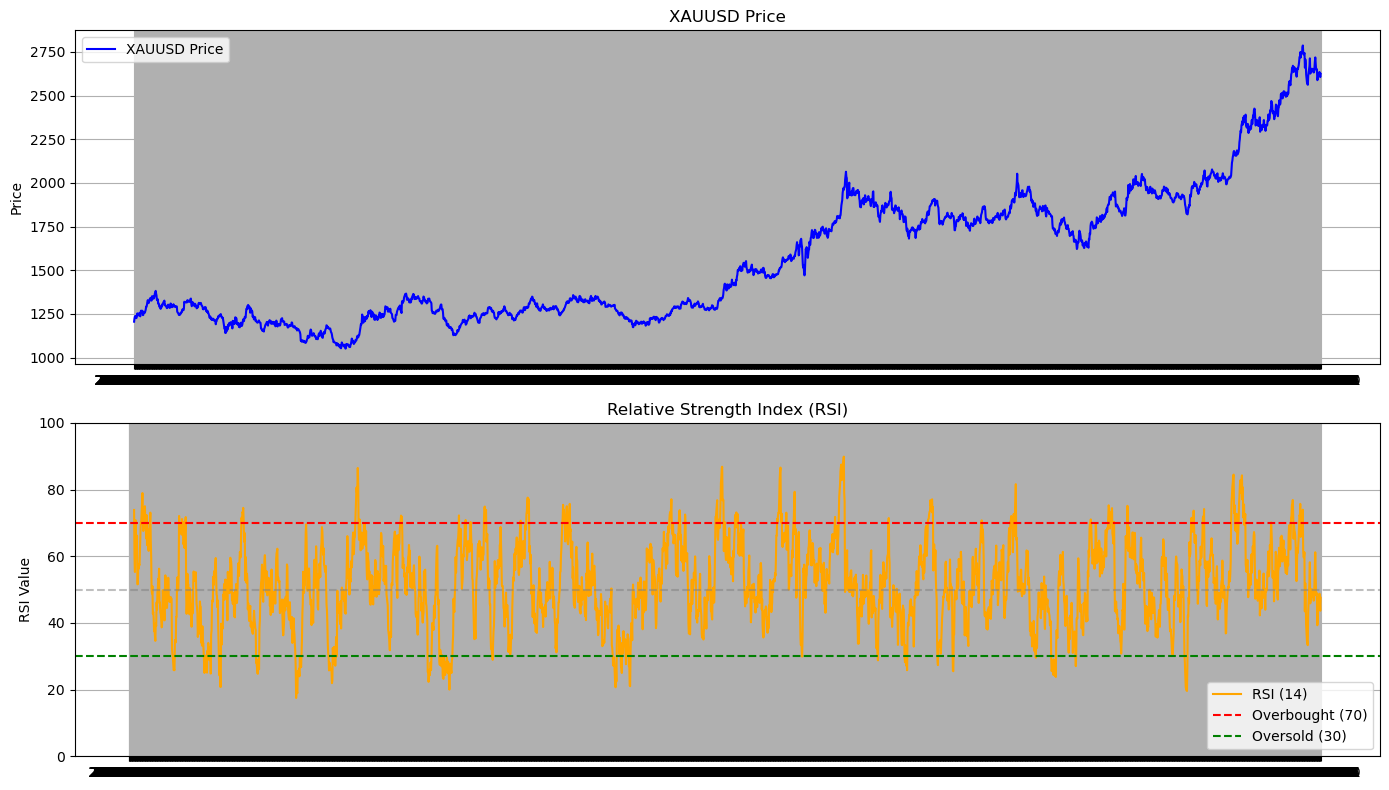

In [44]:
# Plotting RSI

plt.figure(figsize=(14, 8))

# ---- Subplot 1: Price ----
plt.subplot(2, 1, 1)
plt.plot(df.index, df['price'], label='XAUUSD Price', color='blue')
plt.title('XAUUSD Price')
plt.ylabel('Price')
plt.grid(True)
plt.legend()

# ---- Subplot 2: RSI ----
plt.subplot(2, 1, 2)
plt.plot(df.index, rsi, label='RSI (14)', color='orange')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.axhline(50, color='gray', linestyle='--', alpha=0.5)
plt.title('Relative Strength Index (RSI)')
plt.ylabel('RSI Value')
plt.ylim(0, 100)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()